#*Sentiment Analysis with Module of Machine Learning*
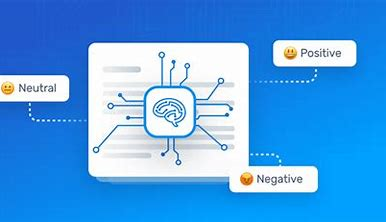


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


In [4]:
data = pd.read_csv("sentimentdataset.csv")
data

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [5]:
review_data = data[['Text','Sentiment']]

print(review_data.shape)
review_data.head(5)

(732, 2)


,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [6]:
review_data["Sentiment"] = review_data["Sentiment"].str.strip()
review_data["Text"] = review_data["Text"].str.strip()

<ipython-input-6-9f2cc1fed4f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_data["Sentiment"] = review_data["Sentiment"].str.strip()
<ipython-input-6-9f2cc1fed4f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_data["Text"] = review_data["Text"].str.strip()


In [7]:
review_data['Sentiment'].nunique

<bound method IndexOpsMixin.nunique of 0      Positive
1      Negative
2      Positive
3      Positive
4       Neutral
         ...   
727       Happy
728       Happy
729       Happy
730       Happy
731       Happy
Name: Sentiment, Length: 732, dtype: object>

In [8]:
review_data["Sentiment"].value_counts()

Positive          45
Joy               44
Excitement        37
Contentment       19
Neutral           18
                  ..
LostLove           1
EmotionalStorm     1
Suffering          1
Bittersweet        1
Intrigue           1
Name: Sentiment, Length: 191, dtype: int64

In [9]:
def Test_sentiment(Sentiment):
    if Sentiment in ['Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Awe', 'Calmness', 'Kind',
                     'Pride', 'Elation', 'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion',
                     'Tenderness', 'Arousal', 'Enthusiasm', 'Fulfillment', 'Reverence', 'Determination', 'Zest', 'Hopeful', 'Proud',
                     'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Free-spirited', 'Inspired', 'Confident', 'Thrill',
                     'Overjoyed', 'Inspiration', 'Motivation', 'JoyfulReunion', 'Positive', 'Energy', 'Happy', 'Excitement', 'Success',
                     'Celebration', 'Accomplishment', 'Positivity', 'Enchantment', 'Connection', 'Amazement', 'Satisfaction', 'Journey',
                     'Touched', 'Renewed Effort', 'Joy in Baking', 'InnerJourney', 'Freedom', 'Blessed', 'Friendship', 'Wonderment',
                     'Adrenaline', 'Harmony', 'Culinary Adventure', 'Reflection', 'Ecstasy']:
        return 'Positive'
    elif Sentiment in ['Negative', 'Sad', 'Hate', 'Bad', 'Sadness', 'Disgust', 'Bitter', 'Confusion', 'Fear', 'Anxiety', 'Intimidation',
                       'Helplessness', 'Regret', 'Despair', 'Grief', 'Loneliness', 'Jealousy', 'Resentment', 'Frustration',
                       'Boredom', 'Dismissive', 'Bitterness', 'Yearning', 'Fearful', 'Apprehensive', 'Overwhelmed', 'Jealous',
                       'Devastated', 'Frustrated', 'Envious', 'Thrilling Journey', 'Heartbreak', 'Betrayal', 'Suffering',
                       'EmotionalStorm', 'Isolation', 'Disappointment', 'LostLove', 'Exhaustion', 'Sorrow', 'Darkness',
                       'Desperation', 'Ruins', 'Desolation', 'Loss', 'Heartache', 'Solitude']:
        return 'Negative'
    elif Sentiment in ['Neutral']:
        return 'Neutral'
    else :
        return 'other'


# Appliquer la fonction à la colonne 'Sentiment' pour créer une nouvelle colonne 'Sentiment_segment'
review_data['Sentiment'] = review_data['Sentiment'].apply(Test_sentiment)

# Afficher le DataFrame mis à jour
print(review_data)


                                                  Text Sentiment
0                Enjoying a beautiful day at the park!  Positive
1                   Traffic was terrible this morning.  Negative
2                  Just finished an amazing workout! 💪  Positive
3          Excited about the upcoming weekend getaway!  Positive
4          Trying out a new recipe for dinner tonight.   Neutral
..                                                 ...       ...
727  Collaborating on a science project that receiv...  Positive
728  Attending a surprise birthday party organized ...  Positive
729  Successfully fundraising for a school charity ...  Positive
730  Participating in a multicultural festival, cel...  Positive
731  Organizing a virtual talent show during challe...  Positive

[732 rows x 2 columns]


<ipython-input-9-35f9aae3f3cb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_data['Sentiment'] = review_data['Sentiment'].apply(Test_sentiment)


In [10]:
review_data["Sentiment"].value_counts()

Positive    383
other       166
Negative    165
Neutral      18
Name: Sentiment, dtype: int64

In [11]:
# Supprimer les lignes avec des valeurs différentes de "Positive", "Negative" ou "Neutral"
review_data = review_data[review_data['Sentiment'].isin(['Positive', 'Negative', 'Neutral'])]

# Réaffecter l'index si nécessaire
review_data.reset_index(drop=True, inplace=True)

# Afficher le DataFrame filtré
print(review_data)


                                                  Text Sentiment
0                Enjoying a beautiful day at the park!  Positive
1                   Traffic was terrible this morning.  Negative
2                  Just finished an amazing workout! 💪  Positive
3          Excited about the upcoming weekend getaway!  Positive
4          Trying out a new recipe for dinner tonight.   Neutral
..                                                 ...       ...
561  Collaborating on a science project that receiv...  Positive
562  Attending a surprise birthday party organized ...  Positive
563  Successfully fundraising for a school charity ...  Positive
564  Participating in a multicultural festival, cel...  Positive
565  Organizing a virtual talent show during challe...  Positive

[566 rows x 2 columns]


In [12]:
sentiment_label = review_data.Sentiment.factorize()
sentiment_label

(array([0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [13]:
review_data["Text"] = review_data["Text"].str.strip()
review_data

,Text,Sentiment
0,Enjoying a beautiful day at the park!,Positive
1,Traffic was terrible this morning.,Negative
2,Just finished an amazing workout! 💪,Positive
3,Excited about the upcoming weekend getaway!,Positive
4,Trying out a new recipe for dinner tonight.,Neutral
...,...,...
561,Collaborating on a science project that receiv...,Positive
562,Attending a surprise birthday party organized ...,Positive
563,Successfully fundraising for a school charity ...,Positive
564,"Participating in a multicultural festival, cel...",Positive


In [14]:

# Liste d'emojis à supprimer
emojis_to_remove = ['💪', '❤️', '🎂','🎨','🎉','🐾',]

# Créer une expression régulière en utilisant la liste d'emojis
pattern = '|'.join(re.escape(emoji) for emoji in emojis_to_remove)

# Appliquer le remplacement dans la colonne 'Text'
review_data['Text'] = review_data['Text'].str.replace(pattern, '')

# Afficher le DataFrame mis à jour
print(review_data)


                                                  Text Sentiment
0                Enjoying a beautiful day at the park!  Positive
1                   Traffic was terrible this morning.  Negative
2                   Just finished an amazing workout!   Positive
3          Excited about the upcoming weekend getaway!  Positive
4          Trying out a new recipe for dinner tonight.   Neutral
..                                                 ...       ...
561  Collaborating on a science project that receiv...  Positive
562  Attending a surprise birthday party organized ...  Positive
563  Successfully fundraising for a school charity ...  Positive
564  Participating in a multicultural festival, cel...  Positive
565  Organizing a virtual talent show during challe...  Positive

[566 rows x 2 columns]


<ipython-input-14-1b4a5dcd8ae0>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  review_data['Text'] = review_data['Text'].str.replace(pattern, '')


In [15]:
# prompt: comment transformer le colone Texte en type  text

review_data['Text'] = review_data['Text'].astype(str)
review_data['Sentiment'] = review_data['Sentiment'].astype(str)

In [16]:
tweet = review_data.Text.values


In [17]:
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [18]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [19]:
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [20]:
embedding_vector_length = 32
model = Sequential()
vocab_size = len(tokenizer.word_index) + 1
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           67392     
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 84043 (328.29 KB)
Trainable params: 84043 (328.29 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [21]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
15/15 [==============================] - 10s 428ms/step - loss: 0.6818 - accuracy: 0.6482 - val_loss: 0.6857 - val_accuracy: 0.6930
Epoch 2/15
15/15 [==============================] - 4s 274ms/step - loss: 0.6360 - accuracy: 0.6726 - val_loss: 0.7135 - val_accuracy: 0.6930
Epoch 3/15
15/15 [==============================] - 4s 273ms/step - loss: 0.6198 - accuracy: 0.6726 - val_loss: 0.7253 - val_accuracy: 0.6930
Epoch 4/15
15/15 [==============================] - 6s 382ms/step - loss: 0.6006 - accuracy: 0.6726 - val_loss: 0.7130 - val_accuracy: 0.6930
Epoch 5/15
15/15 [==============================] - 4s 262ms/step - loss: 0.5554 - accuracy: 0.6726 - val_loss: 0.7213 - val_accuracy: 0.6930
Epoch 6/15
15/15 [==============================] - 4s 272ms/step - loss: 0.4655 - accuracy: 0.7544 - val_loss: 0.7682 - val_accuracy: 0.6930
Epoch 7/15
15/15 [==============================] - 6s 397ms/step - loss: 0.3370 - accuracy: 0.8938 - val_loss: 1.1758 - val_accuracy: 0.6930
Epoch

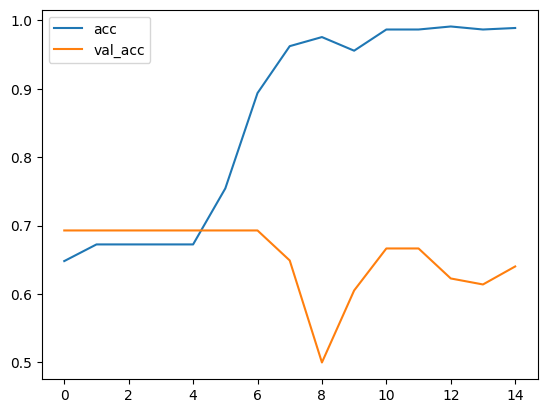

<Figure size 640x480 with 0 Axes>

In [22]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

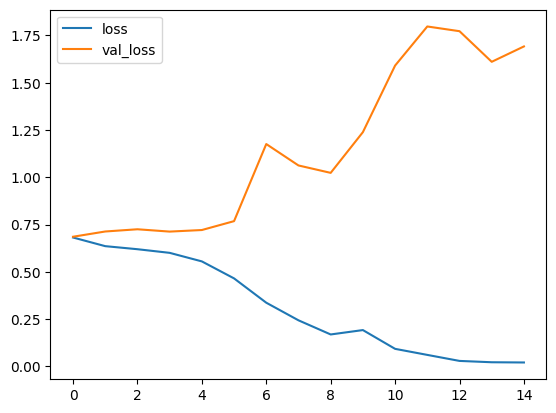

<Figure size 640x480 with 0 Axes>

In [23]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [34]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "terrible"
predict_sentiment(test_sentence1)

test_sentence2 = "friends"
predict_sentiment(test_sentence2)
test_sentence3 = "Bad boy"
predict_sentiment(test_sentence3)



1/1 [==============================] - 0s 86ms/step
Predicted label:  Negative
1/1 [==============================] - 0s 61ms/step
Predicted label:  Positive
1/1 [==============================] - 0s 44ms/step
Predicted label:  Negative
